In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('winequality.csv')
df = df.drop(['good','color'],axis = 1)
small_df = df[:int(len(df.index)/3)]
med_df = df[:int(2 * len(df.index)/3)]

In [3]:
def model(data):
    bins = [1,4,6,10]
    #0 for low quality, 1 for average, 2 for great quality
    quality_labels=[0,1,2]
    data['quality_categorical'] = pd.cut(data['quality'], bins=bins, labels=quality_labels, include_lowest=True)
    #Displays the first 2 columns
    #display(data.head(n=2))
    # Split the data into features and target label
    quality_raw = data['quality_categorical']
    features_raw = data.drop(['quality', 'quality_categorical'], axis = 1)
    
    X_train, X_test, y_train, y_test = train_test_split(features_raw,quality_raw,test_size = 0.3,random_state = 0)
    
    clf_A = GaussianNB()
    clf_B = DecisionTreeClassifier(max_depth=None, random_state=None)
    clf_C = RandomForestClassifier(max_depth=None, random_state=None)
    
    gauss = clf_A.fit(X_train,y_train)
    predict_gauss = clf_A.predict(X_test)
    
    descision = clf_B.fit(X_train,y_train)
    predict_decision = clf_B.predict(X_test)
    
    rand = clf_C.fit(X_train,y_train)
    predict_rand = clf_C.predict(X_test)
    result = pd.DataFrame()

    acc_gauss = float(accuracy_score(y_test, predict_gauss))
    acc_decision = accuracy_score(y_test, predict_decision)
    acc_rand = accuracy_score(y_test, predict_rand)
    
    fs_gauss = fbeta_score(y_test, predict_gauss,beta = 0.5,average = 'weighted')
    fs_decision = fbeta_score(y_test, predict_decision,beta = 0.5,average = 'weighted')
    fs_rand = fbeta_score(y_test, predict_rand,beta = 0.5,average = 'weighted')
    
    acc_result = [acc_gauss,acc_decision,acc_rand]
    f_result = [fs_gauss,fs_decision,fs_rand]
    return acc_result,f_result

In [4]:
small_acc,small_fs = model(small_df)
med_acc,med_fs = model(med_df)
df_acc,df_fs = model(df)


/Users/Bithi/project/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Bithi/project/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Bithi/project/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Bithi/project/lib/python3.6/site-packages/sklearn/ense

In [5]:
df_plot_acc = pd.DataFrame({'x': [len(small_df.index),len(med_df.index),len(df.index)],'gaussian':small_acc,'decision':med_acc,'random':df_acc})
df_plot_fs = pd.DataFrame({'x': [len(small_df.index),len(med_df.index),len(df.index)],'gaussian':small_fs,'decision':med_fs,'random':df_fs})

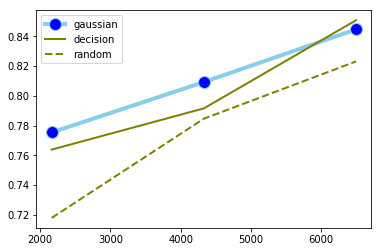

In [6]:
plt.plot( 'x', 'gaussian', data=df_plot_acc, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'decision', data=df_plot_acc, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'random', data=df_plot_acc, marker='', color='olive', linewidth=2, linestyle='dashed')
plt.legend()

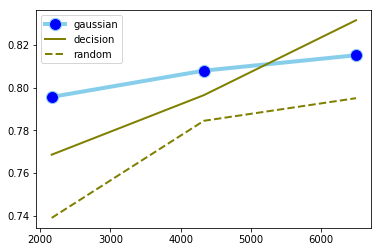

In [7]:
plt.plot( 'x', 'gaussian', data=df_plot_fs, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'decision', data=df_plot_fs, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'random', data=df_plot_fs, marker='', color='olive', linewidth=2, linestyle='dashed')
plt.legend()

In [ ]:
# Import train_test_split
# Split the 'features' and 'income' data into training and testing sets

# Show the results of the split


In [ ]:
# Import any three supervised learning classification models from sklearn

#from sklearn.linear_model import LogisticRegression
# Initialize the three models
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(max_depth=None, random_state=None)
clf_C = RandomForestClassifier(max_depth=None, random_state=None)
# Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(len(y_train)*10/100)
samples_1 = int(len(y_train)*1/100)
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict_evaluate(clf, samples, X_train, y_train, X_test, y_test)
#print(results)
# Run metrics visualization for the three supervised learning models chosen
vs.visualize_classification_performance(results)